###Agrupamento - Clustering

Conjunto de Dados - [Mall_Customers](https://drive.google.com/file/d/1nHYp45X0CTh8HTC36caSwxiaV45GKk1i/view?usp=sharing)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
#Renomeia colunas
df.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#Remove CustomerID
X = df.drop(['CustomerID'], axis=1)

In [ ]:
#Transforma Variável para numérica
labelEncoder = LabelEncoder()
labelEncoder.fit(X['Gender'])
X['Gender'] = labelEncoder.transform(X['Gender'])

In [ ]:
X.head()

,Gender,Age,Income,Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [ ]:
#KMeans com 5 clusters

num_cluster = 5

km = KMeans(n_clusters = num_cluster)
km.fit(X)

KMeans(n_clusters=5)

In [ ]:
km.labels_

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 5, 0, 1, 2,
       1, 0, 5, 2, 2, 2, 5, 2, 2, 5, 5, 5, 5, 5, 2, 5, 5, 2, 5, 5, 5, 2,
       5, 5, 2, 2, 5, 5, 5, 5, 5, 2, 5, 2, 2, 5, 5, 2, 5, 5, 2, 5, 5, 2,
       2, 5, 5, 2, 5, 2, 2, 2, 5, 2, 5, 2, 2, 5, 5, 2, 5, 2, 5, 5, 5, 5,
       5, 2, 2, 2, 2, 2, 5, 5, 5, 5, 2, 2, 2, 4, 2, 4, 3, 4, 3, 4, 3, 4,
       2, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6,
       3, 6], dtype=int32)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


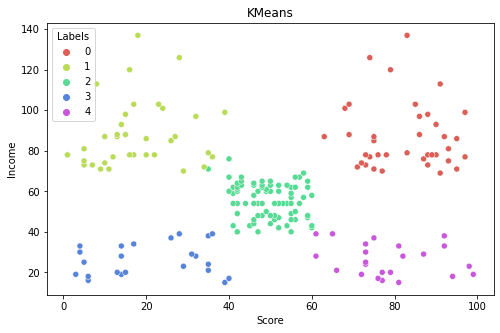

In [ ]:
#Plotar clusters
X['Labels'] = km.labels_
plt.figure(figsize=(8, num_cluster))
sns.scatterplot(X['Score'], X['Income'], hue=X['Labels'], 
                palette=sns.color_palette('hls', num_cluster))
plt.title('KMeans')
plt.show()

###Outros Exemplos

Conjunto de Dados Artificial - [Spiral](https://drive.google.com/file/d/1KZKx-vlXE7aSkM-9UNbgVrLUPS65-RT6/view?usp=sharing)

In [ ]:
X = pd.read_csv('/content/Spiral.csv')
X.head()

,Column1,Column2,Column3
0,3195,795,3
1,3115,73,3
2,3045,665,3
3,297,6,3
4,289,555,3


In [ ]:
X = X.iloc[:,0:2] #remove Column3
X.head()

,Column1,Column2
0,3195,795
1,3115,73
2,3045,665
3,297,6
4,289,555


In [ ]:
num_cluster = 4

km = KMeans(n_clusters = num_cluster)
km.fit(X)

KMeans(n_clusters=4)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


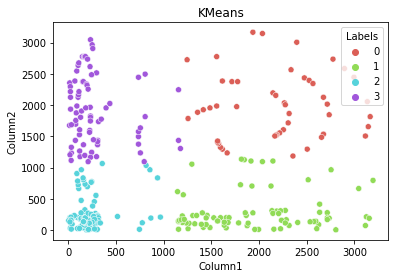

In [ ]:
#Plotar clusters
X['Labels'] = km.labels_
plt.figure(figsize=(6, num_cluster))
sns.scatterplot(X['Column1'], X['Column2'], hue = X['Labels'], 
                palette=sns.color_palette('hls', num_cluster))
plt.title('KMeans')
plt.show()

AgglomerativeClustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

num_cluster = 7

clustering = AgglomerativeClustering(n_clusters = num_cluster, linkage='ward')
clustering.fit(X)

AgglomerativeClustering(n_clusters=7)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


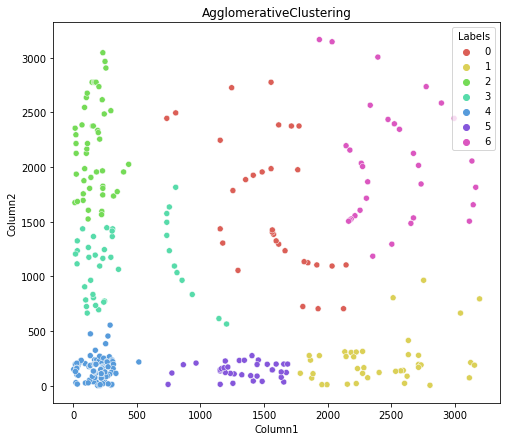

In [ ]:
#Plotar clusters
X['Labels'] = clustering.labels_
plt.figure(figsize=(8, num_cluster))
sns.scatterplot(X['Column1'], X['Column2'], hue = X['Labels'], palette=sns.color_palette('hls', num_cluster))
plt.title('AgglomerativeClustering')
plt.show()